# This notebook controls most of the visualization functionality

# Requirements

These widgets may not show up in your Jupyter notebook without first installing ipywidgets and enabling the extensions.

```
pip install ipywidgets

jupyter nbextension enable --py widgetsnbextension

or

jupyter nbextension enable --py --sys-prefix widgetsnbextension
```

In [1]:
import ipywidgets as wg
from IPython.display import Image
from IPython.display import display
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import glob, os
import imageio

# GUI

This codeblock builds and displays the GUI.

In [2]:
name = wg.Text(value='Name', description="Species: ")
month = wg.SelectionSlider(description="Month: ", options=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'all'])
algo = wg.Dropdown(options = ["CTA", "GLM", "RF"], description="Algorithm: ")
threshold = wg.Dropdown(options = ['1', '10', '50'], description="Prediction threshold: ")
display(name, algo, threshold, month)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

NOTE: In the directory, there are only files for oct/nov/dec of the few species there (e.g. Papilio_glaucus), so if you leave the slider at jan-september, you're gonna have a bad time. When the values for the GUI are changed, no need to hit enter, leave them, and move to the cell below. Once you hit enter in the cell below, the values in the above GUI are registered and appropriately saved. A map (that unfortunately isn't animated) is generated using the user's inputs. It is a possibility to add multiple inline plots, without doing the GIF format, which should have something close to the same effect, but that isn't necessary yet.

SDM: Papilio_glaucus using CTA algorithm with threshold 10 displaying month: dec


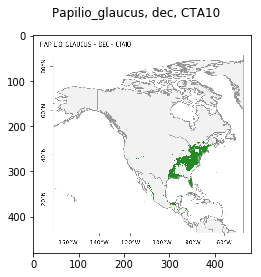

In [17]:
from PIL import Image as Img
from PIL import ImageFont, ImageDraw 
import matplotlib.pyplot as plt
%matplotlib inline
print("SDM: " + name.value + " using " + algo.value + " algorithm with threshold " + threshold.value + " displaying month: " + str(month.value))
picture = name.value + "-" + month.value + "-" + algo.value + "-" + threshold.value + "-prediction-" + algo.value + "-" + threshold.value + ".png"

img = Img.open(name.value+"/"+picture)
draw = ImageDraw.Draw(img)
draw.rectangle(((0, 0), (250, 40)), fill="white")
font = ImageFont.truetype("adventpro.ttf", 16)
draw.text((15, 10),name.value.upper() + ' - ' + month.value.upper() + ' - '+ algo.value + threshold.value,(0,0,0),font=font)
img.save(name.value+"/"+picture)
fig = plt.figure()
fig.suptitle(name.value + ', ' + month.value + ', '+ algo.value + threshold.value)
plt.imshow(img)
plt.show(img)

In [8]:
# Creating GIF (used in subsequent codeblocks)

In [25]:
import glob, os
import imageio

'''
If a GIF is generated for a species for some predictive factor (i.e. 1, 10, or 50) for a given algorithm,
two more GIFs are generated for the other two algorithms. If the user submits 'Papilio_glaucus; "CTA"; 10',
GIFs are generated for 'Papilio_glaucus RF 10 and Papilio_glaucus GLM 10.

Only two are covered right now, given GLM was not saved into the prototype directory. Code must be adapted to datastore.
'''

#Step forward a directory
os.chdir(name.value)

#Creates lists of filenames according to each algorithm
filenames = []
filenames2 = []
filenames3 = []

#Allows reference of other algorithms on top of user input
algo1 = ""
algo2 = ""
if algo.value == "CTA":
    algo1 = "RF"
    algo2 = "GLM"
elif algo.value == "RF":
    algo1 = "CTA"
    algo2 = "GLM"
elif algo.value == "GLM":
    algo1 = "CTA"
    algo2 = "RF"


#Find all files that match this pattern and append them, then prints each list
for file in glob.glob(name.value + '-' + '???' + '-' + algo.value +'-' +'??' + '-prediction-' + algo.value + '-' + '??.png'):
    filenames.append(file)
    
for file2 in glob.glob(name.value + '-' + '???' + '-' + algo1 +'-' +'??' + '-prediction-' + algo1 + '-' + '??.png'):
    filenames2.append(file2)
    
#for file3 in glob.glob(name.value + '-' + '???' + '-' + algo2 +'-' +'??' + '-prediction-' + algo2 + '-' + '??.png'):
#    filenames3.append(file3)
    
print("filename list: ")
filenames.reverse() #Otherwise animation would start with 'all,' and iterate 'dec,' 'nov,' 'oct.'
print(filenames)

print("filename2 list: ")
filenames2.reverse()
print(filenames2)

#print("filename3 list: ")
#filenames3.reverse()
#print(filenames3)


#=======================================THIS SUBSECTION IS FOR TESTING==========================================

def fname_to_header(headings):
    header = [((' '.join((i.split('-')[0]).split(' '))) + ' ' + i.split('-')[1]) for i in headings]
    return header
heading = fname_to_header(filenames)

print("heading list: ")
print(heading)

#=================================================================================================================


#Step back a directory
os.chdir('..')

#Build GIF of images based on saved filenames
images = []
images1 = []
images2 = []
for filename in filenames:
    img = Img.open(name.value+"/"+filename)
    draw = ImageDraw.Draw(img)
    draw.rectangle(((0, 0), (250, 40)), fill="white")
    font = ImageFont.truetype("adventpro.ttf", 16)
    mon = filename.split("-")[1]
    thresh = filename.split("-")[-1].strip(".png")
    draw.text((15, 10),name.value.upper() + ' - ' + mon.upper() + ' - '+ algo.value + thresh,(0,0,0),font=font)
    img.save(name.value+"/"+filename)
    images.append(imageio.imread(name.value + "/" + filename))
for filename in filenames2:
    img = Img.open(name.value+"/"+filename)
    draw = ImageDraw.Draw(img)
    draw.rectangle(((0, 0), (250, 40)), fill="white")
    font = ImageFont.truetype("adventpro.ttf", 16)
    mon = filename.split("-")[1]
    thresh = filename.split("-")[-1].strip(".png")
    draw.text((15, 10),name.value.upper() + ' - ' + mon.upper() + ' - '+ algo1 + thresh,(0,0,0),font=font)
    img.save(name.value+"/"+filename)
    images1.append(imageio.imread(name.value + "/" + filename))
#for filename in filenames3:
#    images2.append(imageio.imread(name.value + "/" + filename))    

#Create gifs/ directory if non exists
if not os.path.exists('gifs/'):
    os.makedirs('gifs/')
    
#Save GIFs; Duration parameter determines how quickly images are looped through in GIF
imageio.mimsave('gifs/' + name.value + '-' + algo.value + '.gif', images, duration=0.3)
imageio.mimsave('gifs/' + name.value + '-' + algo1 + '.gif', images1, duration=0.3)

algo1_gif = ('gifs/' + name.value + '-' + algo.value + '.gif')
algo2_gif = ('gifs/' + name.value + '-' + algo1 + '.gif')
#algo3_gif = ('gifs/' + name.value + '-' + algo2 + '.gif')

from IPython.display import Image as im
from IPython.display import display
algo1_img = im(url=algo1_gif, width=350)
algo2_img = im(url=algo2_gif, width=350)

display(algo1_img, algo2_img)

filename list: 
['Papilio_glaucus-oct-CTA-10-prediction-CTA-10.png', 'Papilio_glaucus-nov-CTA-10-prediction-CTA-10.png', 'Papilio_glaucus-dec-CTA-10-prediction-CTA-10.png']
filename2 list: 
['Papilio_glaucus-oct-RF-10-prediction-RF-10.png', 'Papilio_glaucus-nov-RF-10-prediction-RF-10.png', 'Papilio_glaucus-dec-RF-10-prediction-RF-10.png']
heading list: 
['Papilio_glaucus oct', 'Papilio_glaucus nov', 'Papilio_glaucus dec']


# Another way of bringing up a titled image without animation

AttributeError: 'str' object has no attribute 'value'

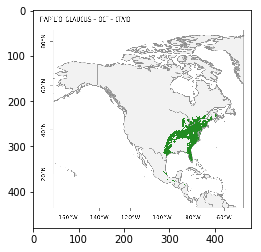

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('gifs/' + name.value + '-' + algo.value + '.gif')
imgplot = plt.imshow(img)
plt.suptitle(name.value + " " + month.value)
plt.show()

# A way of animating the GIFs, but no label/title yet

In [23]:
from IPython import display

def display_gif(fn):
    #return (display.HTML('<h1>{}</h1>'.format(fn)), display.HTML('<img src="{}">'.format(fn)))
    return display.HTML('<img src="{}">'.format(fn))
display_gif('gifs/' + name.value + '-' + algo.value + '.gif')

#fn = 'gifs/' + name.value + '-' + algo.value + '.gif'
#x = display.HTML('<h1>{}</h1>'.format(fn))
#y = display.HTML('<img src="{}">'.format(fn))
#display(x, y)

## Test (Horrendous mess)

In [7]:
from IPython.display import display, HTML, Image

def Images(images, header=heading, width="100%"): # to match Image syntax
    if type(width)==type(1): width = "{}px".format(width)
    html = ["<table style='width:{}'><tr>".format(width)]
    if header is not None:
        html += ["<th>{}</th>".format(h) for h in header]

    for image in images:
        html.append("<td>'<img src='{}' /></td>".format(images))
    html.append("</tr></table>")
    display(HTML(''.join(html)))
Images(('gifs/' + name.value + '-' + algo.value + '.gif'), heading)

def display_gif(fn):
    return display.HTML(['<th>{}</th>'.format(h) for h in header], '<img src="{}">'.format(fn))

Papilio_glaucus oct,Papilio_glaucus nov,Papilio_glaucus dec,',',',',',',',',',',',',',',',',',',',',',',',',',',','
